<h3> LAB 3 - DFT</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
from pylab import *

Considere as seguintes frequências digitais (em rad): 0,1 0,4  pi/10 pi/5 .

In [2]:
# Criação das frequências digitais
w_a = 0.1
w_b = 0.4
w_c = pi/10
w_d = pi/5

No gráfico da esquerda, plote as 4 senoides com 100 amostras.
No gráfico da direita, plote o valor absoluto da DFT dessas 4 senoides.
obs. São apenas dois gráficos, cada um com quatro curvas.

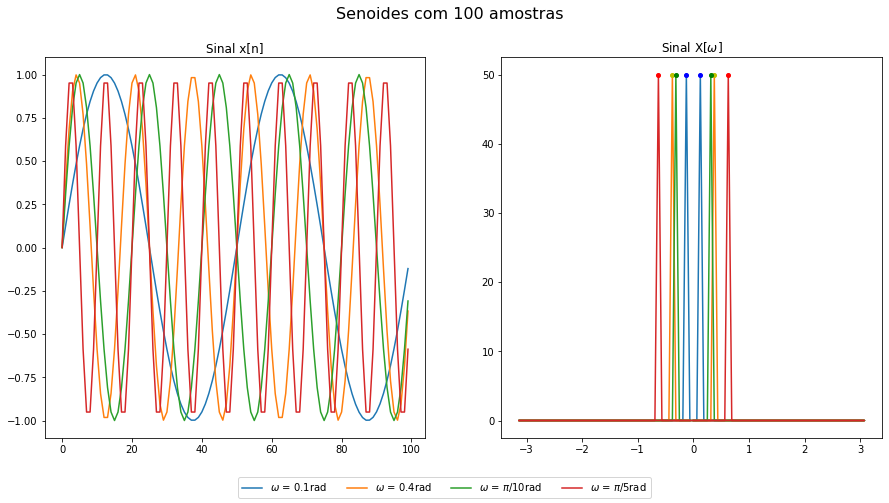

In [7]:
# Vetor n com 100 pontos
n = arange(100)

# Cria as quatro senoides com base 
# no vetor n e nas frequências criadas anteriormente
x_a = sin(n*w_a)
x_b = sin(n*w_b)
x_c = sin(n*w_c)
x_d = sin(n*w_d)

# Módulo da transformada de Fourier de cada sinal x
X_a = abs(fft(x_a))
X_b = abs(fft(x_b))
X_c = abs(fft(x_c))
X_d = abs(fft(x_d))

# Cria um vetor de frequência discreta para plotar
# o segundo gráfico
w = fftfreq(len(n))*2*pi

# Plots 
fig, axarr = subplots(1, 2, figsize=(15,7))
fig.suptitle("Senoides com 100 amostras", fontsize=16)

# Plota os sinais do primeiro gráfico
axarr[0].plot(n,x_a,n,x_b,n,x_c,n,x_d)
axarr[0].set_title('Sinal x[n]')

# Plota os sinais do segundo gráfico
axarr[1].plot(w,X_a,w,X_b,w,X_c,w,X_d)
axarr[1].set_title('Sinal X[$\omega$]')

# Marcadores na coordenadas dos w e valor máximo de cada sinal tranformado
axarr[1].plot(w_a, max(X_a), 'b.', markersize=8)
axarr[1].plot(-w_a, max(X_a), 'b.', markersize=8)
axarr[1].plot(w_b, max(X_b), 'y.', markersize=8)
axarr[1].plot(-w_b, max(X_b), 'y.', markersize=8)
axarr[1].plot(w_c, max(X_c), 'g.', markersize=8)
axarr[1].plot(-w_c, max(X_c), 'g.', markersize=8)
axarr[1].plot(w_d, max(X_d), 'r.', markersize=8)
axarr[1].plot(-w_d, max(X_d), 'r.', markersize=8)

# Plota legenda da figura
fig.legend(['$\omega$ = 0.1rad','$\omega$ = 0.4rad',
            '$\omega$ = $\pi/10$rad','$\omega$ = $\pi/5$rad'],
           loc='lower center',ncol=4)
show()

<b>Comente o que foi observado.</b>

Conforme esperado, vemos que conforme maior o $\omega$, mais ciclos a senoide apresenta no gráfico da esquerda. 
Observa-se também que a senoide fica menos definida em frequências mais altas, indicando que o número de amostras deveria ser maior para se ter uma resolução mais alta. <br> 

Já no gráfico da direita, nota-se que conforme maior a frequência, mais distante é o pico da Transformada de Fourier do ponto central do eixo horizontal. O que reforça a noção de inversa proporcionalidade entre o tempo e a frequência. 

Utilizando marcadores neste gráfico, foi possível comprovar que o pico da função transformada corresponde a frequência fundamental do senos. Assim, mostrando que um seno na frequência corresponde a dois impulsos deslocados em função de mais e menos a frequência $\omega_{0}$.

Por fim, vemos que as curvas de $\omega$ = 0.1 rad e 0,4 rad não estão representadas como um impulso precisamente. Isto acontece porque no vetor w não existem valores que correspondem exatamente a estas frequências. Podemos notar isso porque os marcadores para estas duas frequências estão desalinhados no gráfico acima.

Abaixo uma função foi criada para encontrar os valores mais próximos das frequências digitais do enunciado no vetor w:

In [4]:
# Função que recebe um vetor e um valor de referência, retornando o valor do vetor mais próximo 
def compare(array, value):
    idx = (np.abs(array - value)).argmin()  
    return format(array[idx],'.4')

# format() é utilizado aqui somente para limitar as casas decimais da variável para melhor leitura dos prints
print('Valor mais próximo de w_a (' + str(format(w_a,'.4')) + ') é ' + str(compare(w,w_a)))
print('Valor mais próximo de w_b (' + str(format(w_b,'.4')) + ') é ' + str(compare(w,w_b)))
print('Valor mais próximo de w_c (' + str(format(w_c,'.4')) + ') é ' + str(compare(w,w_c)))
print('Valor mais próximo de w_d (' + str(format(w_d,'.4')) + ') é ' + str(compare(w,w_d)))

Valor mais próximo de w_a (0.1) é 0.1257
Valor mais próximo de w_b (0.4) é 0.377
Valor mais próximo de w_c (0.3142) é 0.3142
Valor mais próximo de w_d (0.6283) é 0.6283


Vemos que w_c e w_d são praticamente iguais e portanto resultam em picos no gráfico da DFT. Já w_a e w_b são substancialmente diferentes. Assim, se trocarmos w_a por 0.1257 e w_b por 0.377 o gráfico da direita terá somente impulsos.

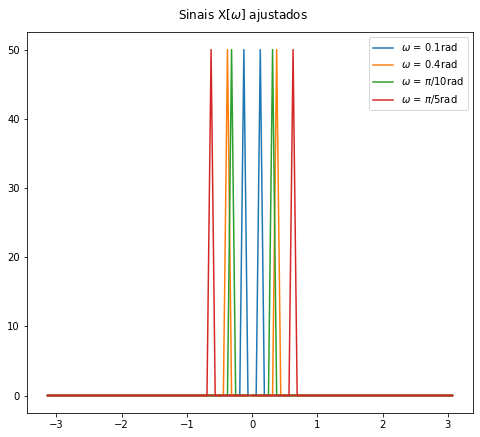

In [9]:
# Novos valores para w_a e w_b
w_a = 0.1257
w_b = 0.377

# Novos valores para x_a e x_b
x_a = sin(n*w_a)
x_b = sin(n*w_b)

# Módulo da transformada de Fourier dos novos x
X_a = abs(fft(x_a))
X_b = abs(fft(x_b))

# Plota os sinais do segundo gráfico
figure(figsize=(8,7))
plot(w,X_a,w,X_b,w,X_c,w,X_d)
suptitle('Sinais X[$\omega$] ajustados', y=0.93)

# Plota legenda da figura
legend(['$\omega$ = 0.1rad','$\omega$ = 0.4rad',
            '$\omega$ = $\pi/10$rad','$\omega$ = $\pi/5$rad'],
           loc='upper right')
show()